In [ ]:
#!pip install quadpy==0.11.3
!pip install nbconvert


In [96]:
!jupyter nbconvert --to html Tarea 3.ipynb

[NbConvertApp] WARNING | pattern u'Tarea_3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbcon

In [ ]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from scipy.stats import multivariate_normal
import scipy.integrate as integrate
import scipy.special as special
import seaborn as sns

# Temas Selectos de Estadística
## Tarea 2
### Ejercicio 1




### Ejercicio 2

In [ ]:
def GOE(H):
  Hs = (H + np.transpose(H))/10
  evs_Hs = np.linalg.eigvals(Hs)
  return evs_Hs

In [ ]:
def gaussian_real_matrix(N):
  matrix_aux = np.zeros((N,N))
  for i in range(0,N):
    for j in range(0,N):
      a = float(multivariate_normal.rvs( mean=0, cov=1, size = 1))
      matrix_aux[i,j] = a
  return np.array(matrix_aux)

In [ ]:
samples = {}
aux_dict = {'X': None}
for i in range(0,1000):
  Z = gaussian_real_matrix(100)
  X = np.matmul(np.transpose(Z),Z)
  aux_dict['X'] =  X
  #aux_dict['eigen_values'] = np.linalg.eigvals(X)
  samples[i] = aux_dict

In [ ]:
samples_GOE = {}
aux_dict_GOE = {'eigen_values': None}
for i in range(0,1000):
  Hs = GOE(samples[i]['X'])
  aux_dict_GOE['eigen_values'] = Hs
  samples_GOE[i] = aux_dict_GOE

In [ ]:
samples_GOE[0]

{'eigen_values': array([3.74001397e+02, 3.59556858e+02, 3.36461584e+02, 3.24001239e+02,
        3.10161857e+02, 3.04237577e+02, 2.96055964e+02, 2.87776666e+02,
        2.77222805e+02, 2.64608881e+02, 2.59030390e+02, 2.51045023e+02,
        2.40898150e+02, 2.30670067e+02, 2.24984107e+02, 2.19416210e+02,
        2.14830544e+02, 2.07242955e+02, 2.08066288e+02, 1.99718618e+02,
        1.93900400e+02, 1.91220496e+02, 1.75498049e+02, 1.81416368e+02,
        1.63074553e+02, 1.67651223e+02, 1.54108956e+02, 1.48321856e+02,
        1.45577081e+02, 1.38485031e+02, 1.35441053e+02, 1.32863141e+02,
        1.17140363e+02, 1.27721356e+02, 1.23384828e+02, 1.11101173e+02,
        1.06425791e+02, 1.04373251e+02, 1.00678888e+02, 9.34865416e+01,
        7.61183531e+01, 8.79717536e+01, 8.68946581e+01, 8.13536419e+01,
        8.49747081e+01, 7.07155840e+01, 6.95270105e+01, 6.58117722e+01,
        6.44882812e+01, 6.23683766e+01, 5.71345784e+01, 5.67144754e+01,
        4.80511685e+01, 4.94521172e+01, 5.191144

In [ ]:
diferencias = []
for i in range(0,1000):
  n = len(samples_GOE[i]['eigen_values'])
  for k in range(0,n-1):
    diferencia = [abs(samples_GOE[i]['eigen_values'][k]-samples_GOE[i]['eigen_values'][j]) for j in range(k+1,n)]
    diferencias = diferencias + diferencia

KeyboardInterrupt: ignored

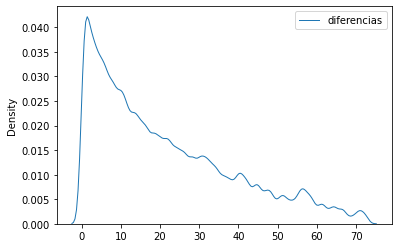

In [ ]:
ensambles = {'diferencias':diferencias}
plot = sns.kdeplot(data=ensambles, alpha=.35, linewidth=1)

# Ejercicio 3

In [ ]:
def gaussian_real_matrix(N):
  matrix_aux = np.zeros((N,N))
  for i in range(0,N):
    for j in range(0,N):
      a = float(multivariate_normal.rvs( mean=0, cov=1, size = 1))
      matrix_aux[i,j] = a
  return np.array(matrix_aux)

In [ ]:
n = 20
X = gaussian_real_matrix(n)
A = (X+np.transpose(X))/n
L,Q = np.linalg.eig(A)
#Q = Q.reshape(n,1)
L = np.diag(L)
dim_jacobiano =int((n*(n+1))/2)
m_jacobiana = np.zeros([dim_jacobiano,dim_jacobiano])
epsilon = 1e-10
idx = 0
mask = np.triu(np.ones([n,n])) - np.identity(n)
mask = mask.astype('bool')

In [ ]:
for i in range(0,n):
  for j in range(i,n):
    ### Matriz de perturbaciones
    Eij = np.zeros([n,n])
    Eij[i,j] = 1
    Eij[j,i] = 1
    Ap = A + epsilon*Eij

    ### Eigenvalores y Eigenvectores
    Lp,Qp = np.linalg.eig(Ap)
    #Qp = Qp.reshape(n,1)
    dL = (np.diag(Lp)-L)/epsilon
    QdQ = np.matmul(np.transpose(Q),(Qp-Q))/epsilon

    ### Matriz Jacobiana
    m_jacobiana[0:n,idx] = np.diagonal(dL)

    m_jacobiana[n:,idx] = QdQ[mask]
    idx = idx+1

Validamos con el determinante del Jacobiano y el determinante de Vandermonde:



In [ ]:
print('Jacobiano: ',abs(np.linalg.det(m_jacobiana)))
print('Vandermonde: ',abs(1/np.linalg.det(np.vander(np.diagonal(L)))))
print('Diferencia :' ,abs(abs(np.linalg.det(m_jacobiana)) - abs(1/np.linalg.det(np.vander(np.diagonal(L))))))

Jacobiano:  2.9669249288066317e+113
Vandermonde:  9.934573878147292e+95
Diferencia : 2.9669249288066317e+113


Podemos observar que los valores se aproximan de manera satisfactoria. En la realización del ejercicio se notó que para dimensiones chicas estos valores pueden diferir por mucho y no aproximarse para nada.

## Ejercicio 4

In [ ]:
## Ingresar parte real
re_z = np.sqrt(2) - .0001
## 
if abs(re_z) >= np.sqrt(2):
  re_z = None
  print('ERROR: Real(z) debe ser más chico que el valor absoluto de sqrt(2)')

In [ ]:
## Ingresar parte imaginaria
im_z = 1000
z = complex(re_z,-im_z)
print(z)

(1.4141135623730952-1000j)


In [ ]:
result = integrate.quad(lambda x: np.sqrt(2-pow(x,2))/(np.pi*(z-x)),-np.sqrt(2),0)
print(result)

(1.007162017711073e-06, 5.948047197904083e-09)


/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:453: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [ ]:
import scipy
from scipy.integrate import quad

def complex_integral(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

In [ ]:
complex_integral(lambda x: np.sqrt(2-pow(x,2))/(np.pi*(z-x)),-np.sqrt(2),0)

((1.007162017711073e-06+0.0004999979013850756j),
 (5.948047197904083e-09,),
 (5.6236048803781635e-14,))

In [ ]:
Gav_infty = complex_integral(lambda x: np.sqrt(2-pow(x,2))/(np.pi*(z-x)),-np.sqrt(2),np.sqrt(2))

In [ ]:
Gav_infty_plus = z + np.sqrt(pow(z,2)-2)
print(Gav_infty)

((1.4141129221029666e-06+0.0009999975002933322j), (5.952493916506455e-09,), (6.367567063902957e-13,))


In [ ]:
Gav_infty_minus = z - np.sqrt(pow(z,2)-2)
print(Gav_infty)

((1.4141129221029666e-06+0.0009999975002933322j), (5.952493916506455e-09,), (6.367567063902957e-13,))


In [ ]:
Gav_infty[0] - Gav_infty_minus

(4.3085630005225585e-12-5.051991811000356e-14j)

Se puede observar que el valor de $G_{\infty}^{av}$ en este caso coincide con $G_{\infty -}^{av}$.